# inkme_creatingmodel

Finally we will use Keras to create the model that will do the predictions. We will start creating a first test model to confirm the code is working and to serve as baseline.

In [1]:
# Importing libraries

import sys
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

2023-03-13 12:26:44.989802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Creating baseline model just to see if it works
 
# Define cnn model

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# Plot diagnostic learning curves

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.close()

# Run the test harness for evaluating a model

def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory('/Users/caionunez/Desktop/cnn_model/dataset/train',class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = datagen.flow_from_directory('/Users/caionunez/Desktop/cnn_model/dataset/test',class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# Entry point, run the test harness
run_test_harness()

### Final model

After a lot of testing and tuning, some of the characteristics of the final model were:

- Three block VGG
- 25 epochs
- Moderate data augmentation (widht shift, height shift and horizontal flip)

In [ ]:
# Define cnn model

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### Testing with 25 epochs and basic data augmentation

In [35]:
# Running with 25 epochs and basic data augmentation

# define model
model = define_model()
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = train_datagen.flow_from_directory('/Users/caionunez/Desktop/cnn_model/dataset/train', class_mode='categorical', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('/Users/caionunez/Desktop/cnn_model/dataset/test', class_mode='categorical', batch_size=64, target_size=(200, 200))
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=25, verbose=1)
# evaluate model
loss, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
print("Loss is : ", loss, "and", "Accuracy is: ",'> %.3f' % (acc * 100.0))

Found 6076 images belonging to 4 classes.
Found 1524 images belonging to 4 classes.
Epoch 1/25


2023-03-12 21:53:33.701412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - ETA: 0s - loss: 1.5103 - accuracy: 0.3065

2023-03-12 21:54:19.936624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - 49s 512ms/step - loss: 1.5103 - accuracy: 0.3065 - val_loss: 1.3473 - val_accuracy: 0.3058
Epoch 2/25
95/95 [==============================] - 49s 517ms/step - loss: 1.3153 - accuracy: 0.3876 - val_loss: 1.2709 - val_accuracy: 0.4331
Epoch 3/25
95/95 [==============================] - 49s 518ms/step - loss: 1.2729 - accuracy: 0.4320 - val_loss: 1.2321 - val_accuracy: 0.4639
Epoch 4/25
95/95 [==============================] - 53s 559ms/step - loss: 1.2157 - accuracy: 0.4689 - val_loss: 1.1696 - val_accuracy: 0.5013
Epoch 5/25
95/95 [==============================] - 57s 598ms/step - loss: 1.1792 - accuracy: 0.4837 - val_loss: 1.1843 - val_accuracy: 0.4652
Epoch 6/25
95/95 [==============================] - 57s 595ms/step - loss: 1.1462 - accuracy: 0.5007 - val_loss: 1.1203 - val_accuracy: 0.5072
Epoch 7/25
95/95 [==============================] - 57s 595ms/step - loss: 1.1170 - accuracy: 0.5133 - val_loss: 1.1053 - val_accuracy: 0.5328
Epoch 8/25

In [36]:
train_loss, train_acc = model.evaluate(train_it, steps=len(train_it), verbose=1)
print("Training Loss is : ", train_loss, "Training Accuracy is: ",'> %.3f' % (train_acc * 100.0))

95/95 [==============================] - 45s 471ms/step - loss: 0.9688 - accuracy: 0.5765
Training Loss is :  0.968762993812561 Training Accuracy is:  > 57.653


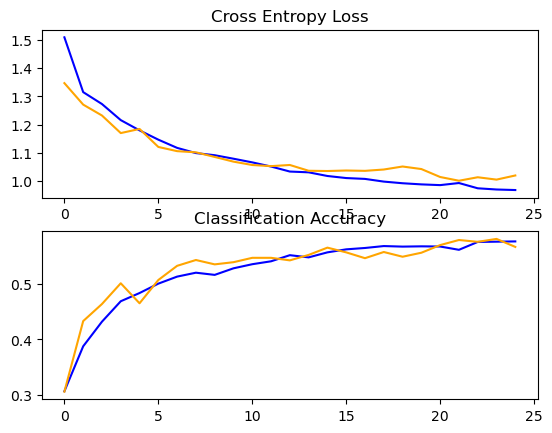

In [37]:
# Plotting the model's performance

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
# Saving this one with 25 epochs and basic data augmentation

model.save("/inkme/model")